# Creating Model to predict Bacardi volumes for FY23

In [1]:
import pandas as pd
import numpy as np

## 1. Loading Data

In [2]:
cd ..

/Users/lucastrost/Documents/GitHub/Ironhack-Final-Project-Bacardi


In [3]:
cd data

/Users/lucastrost/Documents/GitHub/Ironhack-Final-Project-Bacardi/Data


In [4]:
df = pd.read_excel('cleaned_pure_players_1.xlsx')

In [5]:
df

,Month,Customer Group 1,Category,Brand,Brandline,Format,Classification,Geography,Agency Toggle,Market,Currency,Vol 9LC,DataInd
0,2019-04-01,Amazon France,SPARKLING,AGENCY,PIPER HEIDSIECK,75.0,STANDARD,France,Y,FR,EUR,15.500000,Sell In
1,2019-04-01,Amazon France,SPARKLING,AGENCY,PIPER HEIDSIECK ROSE,75.0,STANDARD,France,Y,FR,EUR,1.500000,Sell In
2,2019-04-01,Amazon France,CACHACA,LEBLON,LEBLON CACHACA,70.0,PREMIUM,France,N,FR,EUR,0.466667,Sell In
3,2019-04-01,Amazon France,COGNAC,OTARD,OTARD VSOP,70.0,PREMIUM,France,N,FR,EUR,0.933333,Sell In
4,2019-04-01,Amazon France,GIN,BOMBAY,BOMBAY GIN,70.0,STANDARD,France,N,FR,EUR,3.733333,Sell In
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26294,2022-03-01,YOPOGOELHIELO,VODKA,ERISTOFF,ERISTOFF VODKA,100.0,STANDARD,Spain,N,ES,EUR,6.666667,Sell In
26295,2022-03-01,YOPOGOELHIELO,VODKA,ERISTOFF,ERISTOFF VODKA,70.0,STANDARD,Spain,N,ES,EUR,4.666667,Sell In
26296,2022-03-01,YOPOGOELHIELO,VODKA,GREY GOOSE,GREY GOOSE ORIGINAL,70.0,STANDARD,Spain,N,ES,EUR,9.333333,Sell In
26297,2022-03-01,YOPOGOELHIELO,WHISKY - Blended,DEWAR'S,DEWAR'S CARIBBEAN SMOOTH,70.0,PREMIUM,Spain,N,ES,EUR,0.466667,Sell In


### 1.1 Formating DataFrame (previous formating done in excel)

In [6]:
# focusing on Brands as a whole
df = df.drop(['Brandline'], axis = 1)

# resetting index
df.reset_index(drop=True, inplace=True)

# change data type of Format
df['Format'] = df['Format'].astype('object')

# 2. Statistical Model SARIMA (Seasonally adjusted ARIMA)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from dateutil.relativedelta import relativedelta

In [8]:
# creating DataFrame
df_arima = df.groupby(['Month']).sum()

In [9]:
# plot formating
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_style('whitegrid')

## 2.1 Automated Model

for the un-automated version see below

### 2.1.1 Check accuracy of our stats model by comparing to the past

In [10]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [11]:
model = pm.auto_arima(df_arima['Vol 9LC'], seasonal=True, m=9)
preds = model.predict(len(df_arima['Vol 9LC'])-18, len(df_arima['Vol 9LC'])-1)

In [12]:
forecast = []
for i in range(1,19):
    forecast.append(0)
for i in preds:
    forecast.append(i)
print(len(forecast),forecast)

36 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15145.535213631818, 16183.45924580929, 14842.434360518226, 7502.604875941736, 16897.864120222363, 16859.08512969833, 11189.663909189094, 16759.93874668941, 13084.72145469837, 12927.56210714938, 12050.863404350734, 14765.993780504003, 13350.416675470646, 24545.819648948105, 20362.283686820487, 8795.50367711626, 12680.821606392548, 13237.333280742632]


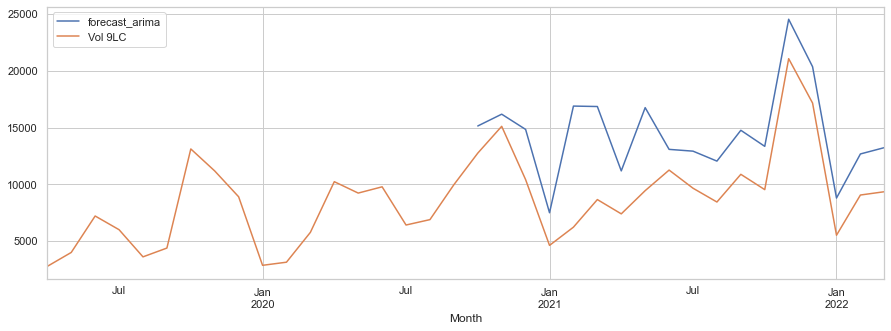

In [13]:
df_arima['forecast_arima'] = forecast
df_arima['forecast_arima'] = df_arima['forecast_arima'].replace(0, np.nan)
df_arima[['forecast_arima','Vol 9LC']].plot(figsize = (15,5));

### 2.1.2 Forecast into the future

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# removing "forecast of the past"
df_arima = df_arima.drop(['forecast_arima'], axis = 1)

In [16]:
# creating a "future DataFrame"
start = datetime.datetime.strptime('2022-04-01','%Y-%m-%d')
date_list = [start + relativedelta(months = x) for x in range (0,12)]
future = pd.DataFrame(index = date_list, columns = df_arima.columns)

In [17]:
# Combining DataFrames
df_forecast = pd.concat([df_arima, future], axis = 0).reset_index()
df_forecast.index = pd.DatetimeIndex(df_forecast['index'])
del df_forecast['index']
df_forecast

,Vol 9LC
index,
2019-04-01,2780.742379
2019-05-01,4005.14139
2019-06-01,7215.512067
2019-07-01,6008.680143
2019-08-01,3616.573866
2019-09-01,4391.238885
2019-10-01,13121.70026
2019-11-01,11183.57021
2019-12-01,8908.099275


In [18]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [19]:
# Generating parameters automatically
model = pm.auto_arima(df_arima['Vol 9LC'], seasonal=True, m=12)
auto = model.fit(df_arima['Vol 9LC'])
auto

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

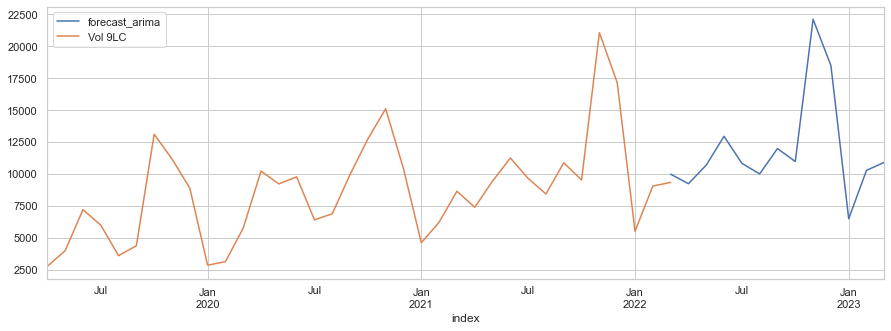

In [20]:
# Implementing and plotting seasonally adjusted model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_arima['Vol 9LC'], order = (2,0,2), seasonal_order = (0,1,0,12))

model_fit1 = model.fit()
df_forecast['forecast_arima'] = model_fit1.predict(start = 35, end = 48, dynamic = True)

df_forecast[['forecast_arima', 'Vol 9LC']].plot(figsize = (15,5))
plt.grid(True);

## 2.1.3 Create csv file

In [21]:
df_forecast.to_csv('Sarima_forecast.csv')

## 2.2 Manual Version

- p - decomposition plots
- d - patial autocorrelation plots
- q - adfuller

### 2.2.1 - P

In [22]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_style('whitegrid')

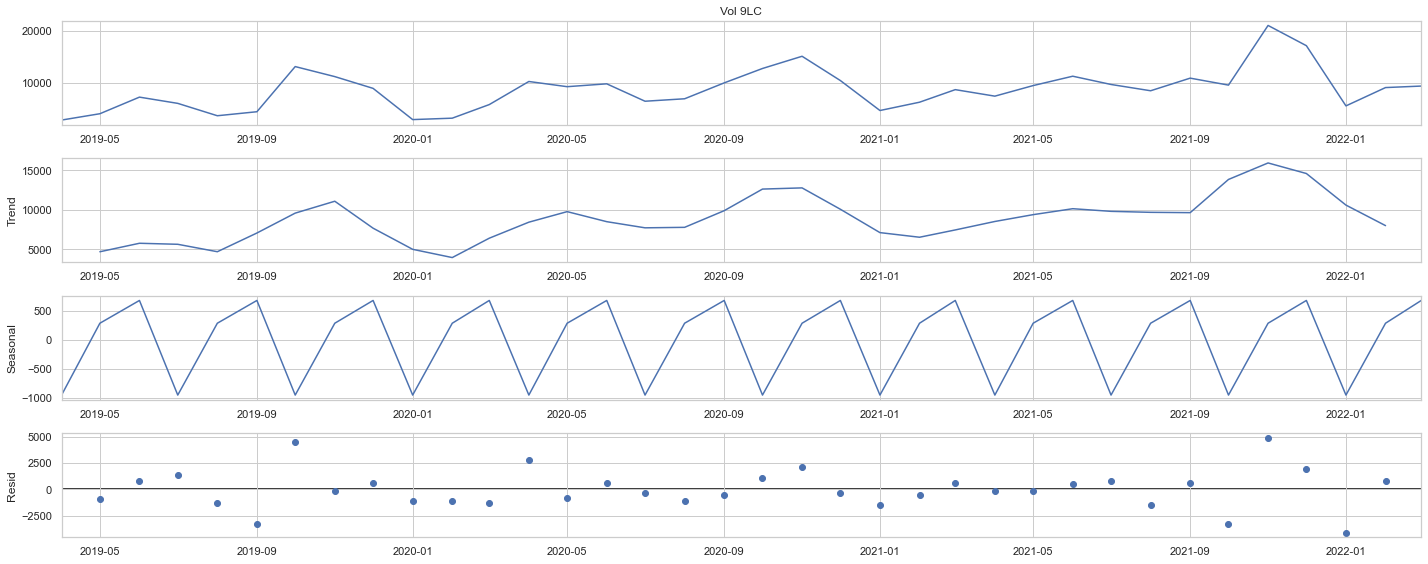

In [23]:
decomp = sm.tsa.seasonal_decompose(df_arima['Vol 9LC'], period = 3)
decomp.plot()
plt.show;

### 2.2.2 D

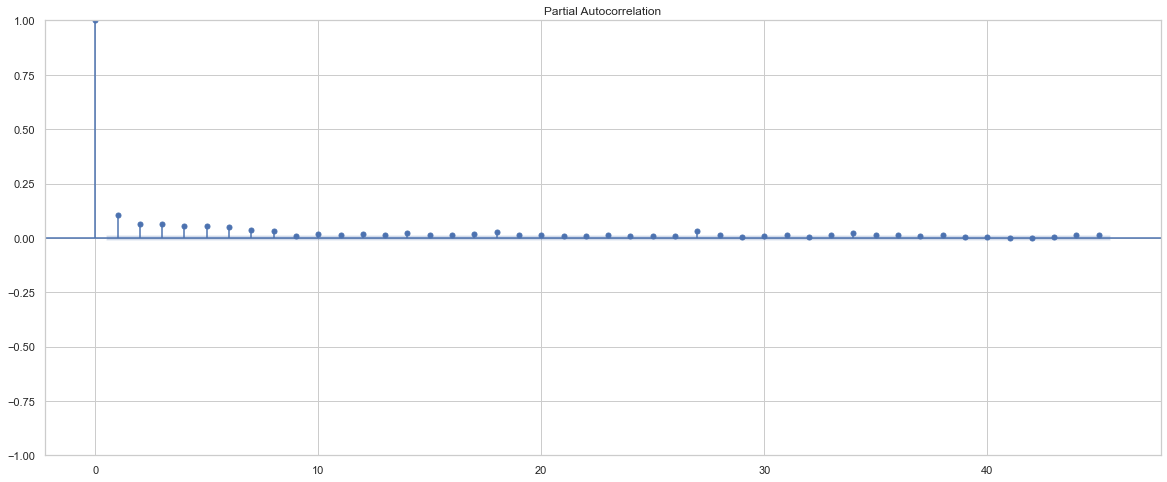

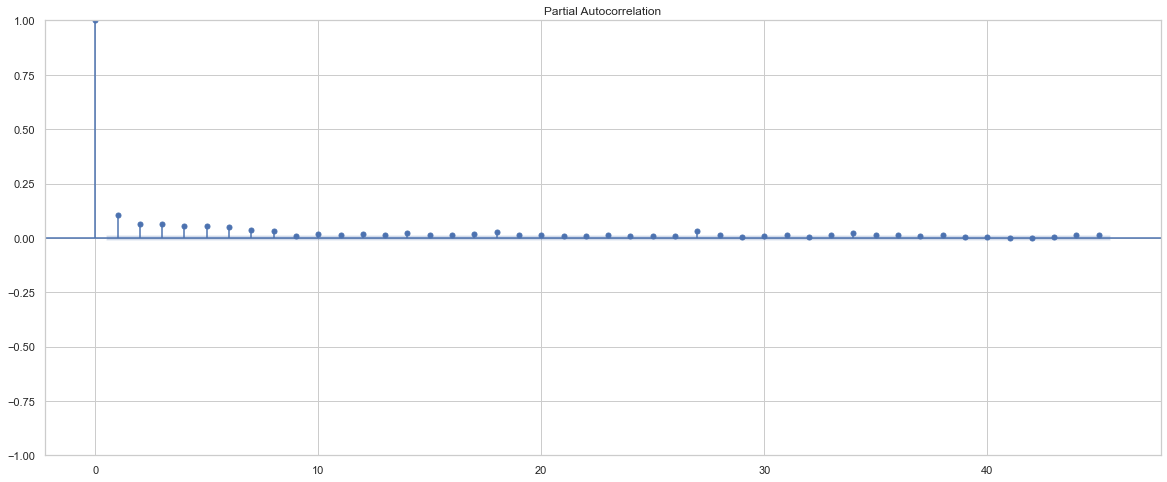

In [24]:
selected = df['Vol 9LC']
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(selected, method='ywm')

### 2.2.3 Q

In [25]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_arima['Vol 9LC'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -4.2652210283232
ADF p-values: 0.0005100156183918444
ADF number of lags used: 1
ADF number of observations: 34
ADF critical values: {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}
ADF best information criterion: 480.39694101723177


# 3. Forecast through Machine Learning

Note: The accuracy of Machine Learning is heavily dependent on the amount of information the machine gets, i.e. number of column and rows. Thus we gathered and stored data in the excel sheet:'ML_features_final.xlsx', in order to have enough features to create a proper model

In [26]:
# read test and train sheet into python
xls = pd.ExcelFile('ML_features_final.xlsx')
df_train = pd.read_excel(xls, 'Train')
df_pred = pd.read_excel(xls, 'Prediction')

## 3.1 Combining DataFrames

In [27]:
# concatenate and reset index
df = pd.concat([df_train,df_pred], axis = 0)
df.reset_index(inplace = True, drop =True)

In [28]:
# drop unwanted columns
df = df.drop(['Customer Group 1','Brand','Brandline', 'Currency', 'DataInd', 'Market'], axis = 1)

## 3.2 Preprocessing

In [29]:
# we want format to be an object
df['Format'] = df['Format'].astype(object)

In [30]:
# set X and y
y = df['Vol 9LC']
X = df.drop(['Vol 9LC', 'Month'], axis = 1)

In [31]:
# split into data types
numericals = X.select_dtypes(np.number)
categoricals = X.select_dtypes(object)

### 3.2.1 Numericals

In [32]:
# scale our only numerical: temperature
from sklearn.preprocessing import MinMaxScaler
num_scaled = MinMaxScaler().fit_transform(numericals.values)
df_numericals = pd.DataFrame(num_scaled, columns = ['Temperature'])

### 3.2.2 Categoricals

In [33]:
# encode categoricals with one hot encoder
from sklearn.preprocessing import OneHotEncoder as ohe
encoder = ohe(drop = 'first').fit(categoricals)
cat_enc = encoder.transform(categoricals).toarray()
cat_enc_cols = encoder.get_feature_names_out(categoricals.columns)
cat_enc_df = pd.DataFrame(cat_enc, columns = cat_enc_cols)
df_categoricals = cat_enc_df

### 3.2.3 Returning to old form

In [34]:
# combining types
X_full = pd.concat([df_categoricals,df_numericals], axis =1)
# combining X and y
df_full = pd.concat([X_full,y], axis =1)

### 3.2.4 Creating train-forecast split

In [35]:
# forecast
df_pred_final = df_full[df_full['Vol 9LC'].isna()]
# train
df_train_final = df_full[df_full['Vol 9LC'].notnull()]

## 3.3 Boosted model

In [36]:
# X, y split
y_train = df_train_final['Vol 9LC']
X_train = df_train_final.drop(['Vol 9LC'], axis = 1)

In [37]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor as rfr
reg = rfr(n_estimators = 200, max_depth = 6, random_state = 40)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=200, random_state=40)

### 3.3.1 Boosting

In [38]:
# feature importance
feature_importances = reg.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(feature_importances, index = feature_names)
lst = forest_importances.tolist()
forest_importances.sort_values(ascending = False)

Temperature                     0.308346
Format_100.0                    0.195221
Category_GIN                    0.123505
Geography_UK                    0.095322
Upcoming Christmas_Yes          0.072910
Classification_STANDARD         0.041733
Geography_Germany               0.034949
Consumer Confidence_Increase    0.021587
Movement_Low                    0.016363
Movement_Very Low               0.016072
Format_70.0                     0.014641
Category_RUM                    0.013737
Format_75.0                     0.013061
Geography_Spain                 0.005011
Category_NON-ALCOHOLIC          0.004711
Movement_High                   0.003246
Season_spring                   0.003192
Category_SPARKLING              0.002390
Season_winter                   0.002335
Category_WHISKY - Blended       0.001890
Format_150.0                    0.001643
Season_summer                   0.001503
Category_LIQUEUR                0.001472
Category_VERMOUTH               0.001324
Category_WHISKY 

### 3.3.2 Re-run Model

In [39]:
# resetting X and y
y_train = df_train_final['Vol 9LC']
X_train = df_train_final.drop(['Vol 9LC'], axis = 1)

In [40]:
# Creating optimized X_train (treshold for importance chosen at 0,004)
X_train_opt = X_train[["Temperature","Format_100.0","Category_GIN","Geography_UK","Upcoming Christmas_Yes",
                       "Classification_STANDARD","Geography_Germany","Consumer Confidence_Increase",
                       "Movement_Very Low","Category_RUM","Format_70.0","Movement_Low","Format_75.0",
                       "Geography_Spain","Category_NON-ALCOHOLIC","Season_spring"]]   

In [41]:
# repeat for prediction
y_pred= df_pred_final['Vol 9LC']
X_pred = df_pred_final.drop(['Vol 9LC'], axis = 1)

In [42]:
X_pred_opt = X_pred[["Temperature","Format_100.0","Category_GIN","Geography_UK","Upcoming Christmas_Yes",
                       "Classification_STANDARD","Geography_Germany","Consumer Confidence_Increase",
                       "Movement_Very Low","Category_RUM","Format_70.0","Movement_Low","Format_75.0",
                       "Geography_Spain","Category_NON-ALCOHOLIC","Season_spring"]]   

In [43]:
# re-run model
reg = rfr(n_estimators = 200, max_depth = 6, random_state = 40)
reg.fit(X_train_opt, y_train)
y_pred = reg.predict(X_pred_opt)

### 3.3.3 Assign predicted values

In [44]:
# split train and pred DataFrames
df_forecast = df[df['Vol 9LC'].isna()]
df_past = df[df['Vol 9LC'].notnull()]

In [45]:
# Create new column with forecast
df_forecast['Forecast'] = y_pred

In [46]:
# Add DataFrames together
df_full_volume = pd.concat([df_past, df_forecast], axis = 0)

In [47]:
# Grouping by month
#df_full_volume = df_full_volume.groupby(['Month']).sum()

In [48]:
# Turning 0s, created by sum() into nulls again
#df_full_volume = df_full_volume.replace(0, np.nan)

### 3.3.4 Depicting results

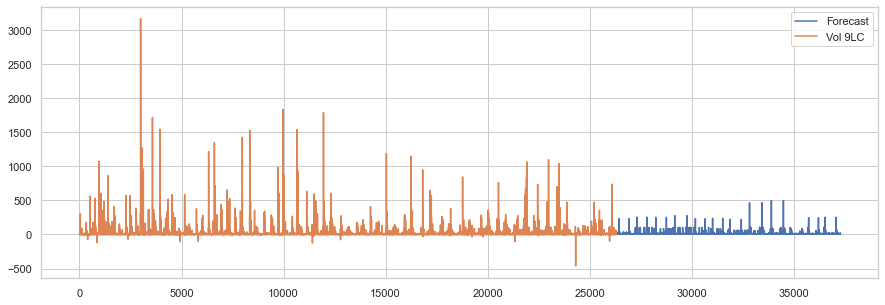

In [49]:
df_full_volume[['Forecast', 'Vol 9LC']].plot(figsize = (15,5))
plt.grid(True);

## 3.4 Stacking

Note: As we cannot "test" our results, we go on to stack multiple models on top of each other in order to achieve the highest accuracy. Regression models used are: RandomForest, K-Nearest-Neighbours, Linear

### 3.4.1 Run stacked + boosted model

In [55]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as knr

estimators = [('rf', rfr(n_estimators=200, random_state=40, max_depth = 7)),('knr', knr(n_neighbors = 7))]
reg = StackingRegressor(estimators=estimators, final_estimator= LinearRegression())
reg.fit(X_train_opt, y_train)
y_pred2 = reg.predict(X_pred_opt)

### 3.4.2 Repeat assigning and depicting process

In [56]:
df_forecast = df[df['Vol 9LC'].isna()]
df_past = df[df['Vol 9LC'].notnull()]

df_forecast['Forecast'] = y_pred2

df_full_volume = pd.concat([df_past, df_forecast], axis = 0)

#df_full_volume = df_full_volume.groupby(['Month']).sum()
#df_full_volume = df_full_volume.replace(0, np.nan)

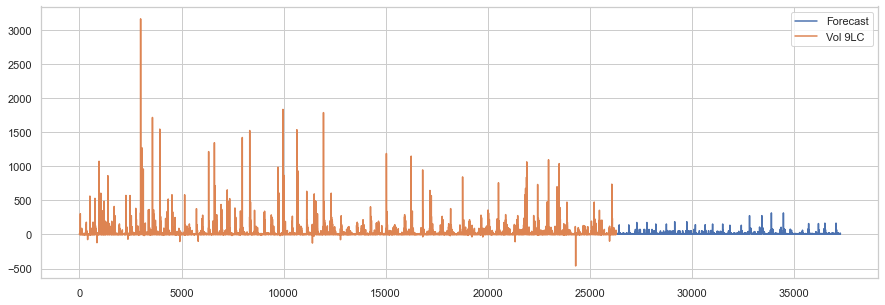

In [57]:
df_full_volume[['Forecast', 'Vol 9LC']].plot(figsize = (15,5))
plt.grid(True);

In [58]:
df_full_volume

,Month,Category,Format,Classification,Geography,Agency Toggle,Vol 9LC,Season,Temperature,Consumer Confidence,Movement,Upcoming Christmas,Forecast
0,2019-04-01,SPARKLING,75.0,STANDARD,France,Y,15.500000,spring,11.656333,Increase,Average,No,NaN
1,2019-04-01,SPARKLING,75.0,STANDARD,France,Y,1.500000,spring,11.656333,Increase,Average,No,NaN
2,2019-04-01,CACHACA,70.0,PREMIUM,France,N,0.466667,spring,11.656333,Increase,Average,No,NaN
3,2019-04-01,COGNAC,70.0,PREMIUM,France,N,0.933333,spring,11.656333,Increase,Average,No,NaN
4,2019-04-01,GIN,70.0,STANDARD,France,N,3.733333,spring,11.656333,Increase,Average,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37280,2023-03-01,VODKA,100.0,STANDARD,Spain,N,NaN,autum,10.194516,Decrease,Average,No,15.082810
37281,2023-03-01,VODKA,70.0,STANDARD,Spain,N,NaN,autum,10.194516,Decrease,Average,No,8.675171
37282,2023-03-01,VODKA,70.0,STANDARD,Spain,N,NaN,autum,10.194516,Decrease,Average,No,8.675171
37283,2023-03-01,WHISKY - Blended,70.0,PREMIUM,Spain,N,NaN,autum,10.194516,Decrease,Average,No,6.739991


### 3.4.3 Create csv file

In [59]:
df_full_volume.to_csv('MachineLearning_Forecast.csv')